# FYSC12: Beta decay and Fermi Kurie plot
## Data analysis code and lab notebook

### Introduction
* Intro text here

### Some basic things on Python:

In [1]:
## assign a variable:
myvar = 23.5
## print a variable to the notebook:
print(myvar)
## help with any function:
help(print)

23.5
Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



For data storage and analysis, we rely on the *numpy* package. And to plot things, we use the *matplotlib* library. We need to import both before the first use and initialize the interactive plots inside the notebook:

In [2]:
import numpy as np
import matplotlib
# choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg')
import matplotlib.pyplot as plt
# enable interactive notebook plots (
# alternative: use 'inline' instead of 'notebook' for static images)
%matplotlib notebook

### Let's take some data!
#### describe your experiment and settings here

**Important**: write down any settings you apply! And take pictures of the setup/sources.

#### Load the data from the MCA
We have a little helper library called MCA.py that we load here. It provides a new class *Spectrum* and a routine to load (ASCII) files from the MCA: *load_spectrum("filename")*

In [3]:
import MCA
sr90 = MCA.load_spectrum(filename =  'beta_lab_calib/sr90.Spe')


Now it's time to plot the data we just measured!
Run the cell below to see the result appear inside the notebook:

### Plot the first data

<IPython.core.display.Javascript object>


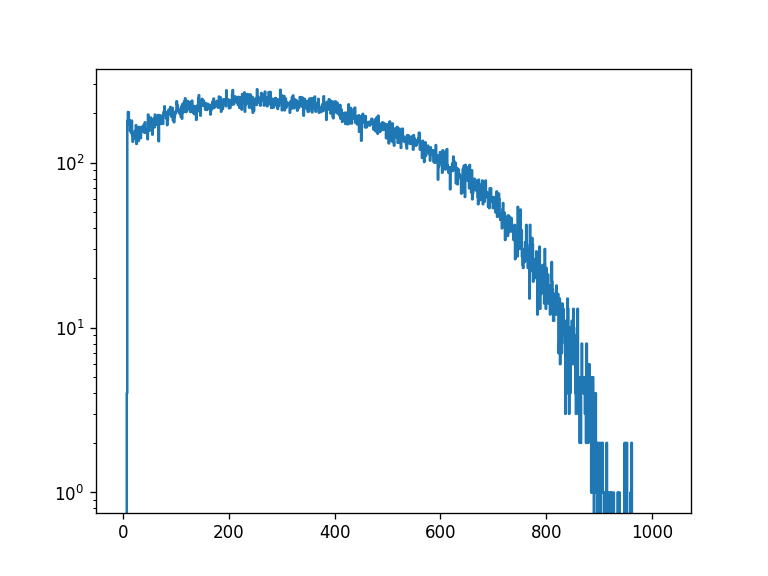

In [4]:
fig, axes = plt.subplots() # makes new plot
axes.plot(sr90.x, sr90.y, linestyle="steps")

## Could be useful to see this in log scale..?
plt.yscale('log')


The result looks (hopefully) more-or-less identical to what we have seen in the MCA software. Good, let's proceed with the analysis then!

**Note**: if you use a pure Python program (not a notebook like we do today) and want to plot with matplotlib, then you need to adjust the indicated lines around the matplotlib import statement add the *plt.show()* command (without arguments) to actually _show_ the plots in a separate window.

#### Questions:
- what is the Q value (in channels) that you read off the plot above? How confident (in units of channels) are you with that reading?

**Answer here**:

## Energy calibration of the detector
We have two different sources available: Cs-137 and Bi-207

Your task:
- have your lab supervisor hand you a source and instruct you to place it at the measurement location
- take a spectrum
- while waiting for the measurement: research the energies of the electrons released by internal conversion from the source you are measuring.

When you are ready, plot the new raw data:

<IPython.core.display.Javascript object>


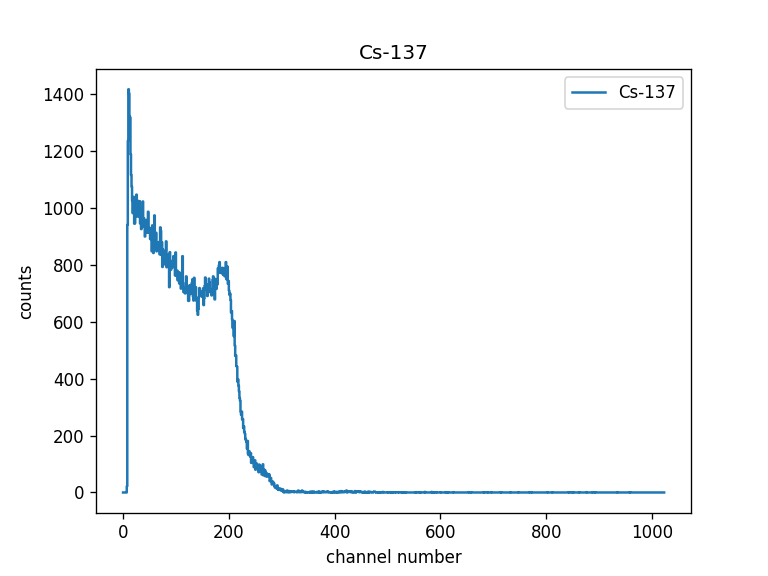

In [5]:
calsource1 = MCA.load_spectrum(filename = 'beta_lab_calib/cs137.Spe')
calsource1.name = "Cs-137"

fig, axes = plt.subplots() # makes new plot
plt.plot(calsource1.x, calsource1.y, linestyle="steps", label = calsource1.name)

## Let's make this plot a little nicer!

plt.xlabel('channel number')
plt.ylabel('counts')
plt.title(calsource1.name)
plt.legend()


### Determining the IC peaks via Gaussian fits

- what is the advantage of using Gaussian fits over reading off the value by eye?

In [6]:
import fithelpers
gfits = fithelpers.fit_all_gaussians(calsource1.x, calsource1.y, loglevel="WARNING")

<IPython.core.display.Javascript object>


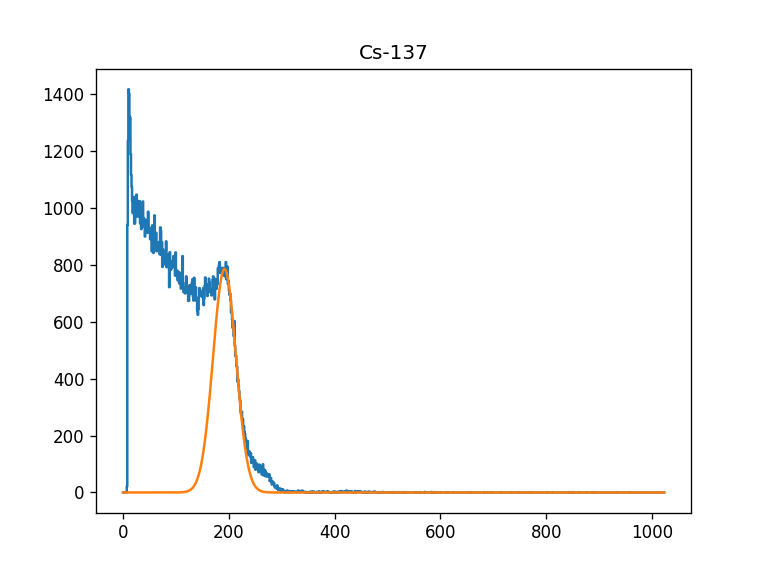

In [7]:
fig, axes = plt.subplots() # makes new plot

axes.plot(calsource1.x, calsource1.y, label = calsource1.name, linestyle="steps")
for g in gfits:
    ## plot the gaussian fit
    axes.plot(calsource1.x, g.value(calsource1.x), 
              label = "Gaussian fit, sgm="+str(round(g.sigma)))
plt.title(calsource1.name)


<IPython.core.display.Javascript object>


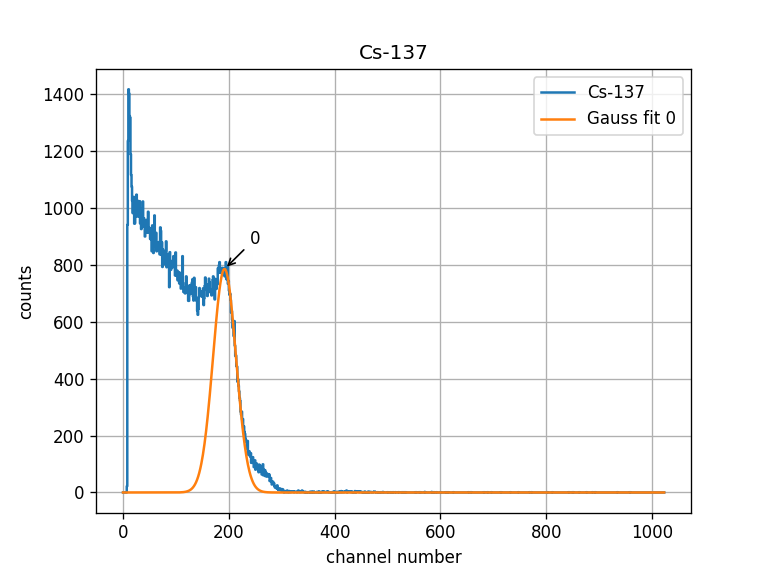

Fitted Gaussian #0: A: 784.8292, mu: 191.8399, sigma: 21.6692


In [8]:
## set up a new plot
fig, axes = plt.subplots() # makes new plot
plt.grid(True)
plt.xlabel('channel number')
plt.ylabel('counts')
plt.title(calsource1.name)

## plot the cs-137 data
plt.plot(calsource1.x, calsource1.y, linestyle='steps',label=calsource1.name)
## loop over all the fit results and enumerate them with an index
for idx, g in enumerate(gfits):
    ## print a line with the fit result
    print("Fitted Gaussian #{}: {}".format(idx, g.as_string()))
    ## plot this gaussian fit too
    plt.plot(calsource1.x, g.value(calsource1.x), 
             label="Gauss fit {}".format(idx))
    ## add a label to the peak position with the fit index
    plt.annotate(idx,
            xy=(g.mu, g.A), xycoords='data', # where to point to
            xytext=(15, 15), textcoords='offset points', # offset
            arrowprops=dict(arrowstyle="->")) # arrowstyle
    
plt.legend() # make legend visible


### Identify the peak and associate an energy to it

In [9]:
calsource1_channel = np.array( [ gfits[0].mu ] )
calsource1_energy  = np.array( [ 0.630 ] )
calsource1_sigma   = np.array( [ gfits[0].sigma ] )


### Now repeat the above steps for the 2nd calibration source

<IPython.core.display.Javascript object>


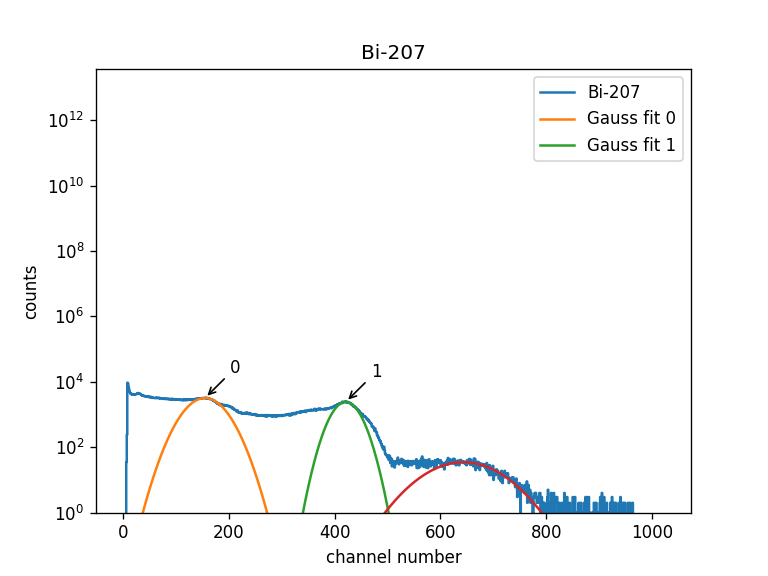

Fitted Gaussian #0: A: 3185.5666, mu: 154.8564, sigma: 29.2515
Fitted Gaussian #1: A: 2426.7681, mu: 421.0883, sigma: 20.5132


In [10]:
calsource2 = MCA.load_spectrum(filename = 'beta_lab_calib/bi207.Spe')
calsource2.name = "Bi-207"
gfits2 = fithelpers.fit_all_gaussians(calsource2.x, calsource2.y, loglevel="WARNING")

fig, axes = plt.subplots() # makes new plot
plt.plot(calsource2.x, calsource2.y, linestyle="steps", label = calsource2.name)

for idx, g in enumerate(gfits2):
    print("Fitted Gaussian #{}: {}".format(idx, g.as_string()))
    plt.plot(calsource2.x, g.value(calsource2.x), 
             label="Gauss fit {}".format(idx))
    plt.annotate(idx,
            xy=(g.mu, g.A), xycoords='data', # where to point to
            xytext=(15, 15), textcoords='offset points', # offset
            arrowprops=dict(arrowstyle="->")) # arrowstyle
    
## Let's make this plot a little nicer!
plt.xlabel('channel number')
plt.ylabel('counts')
plt.yscale('log')
plt.ylim(ymin=1)
plt.title(calsource2.name)
plt.legend()

In [11]:
g3rd = fithelpers.fit_gaussian_at_pos(calsource2.x, calsource2.y, pos=661, npoints=30)
plt.plot(calsource2.x, g3rd.value(calsource2.x), label="3rd peak")

### Plot the energy calibration figure

<IPython.core.display.Javascript object>


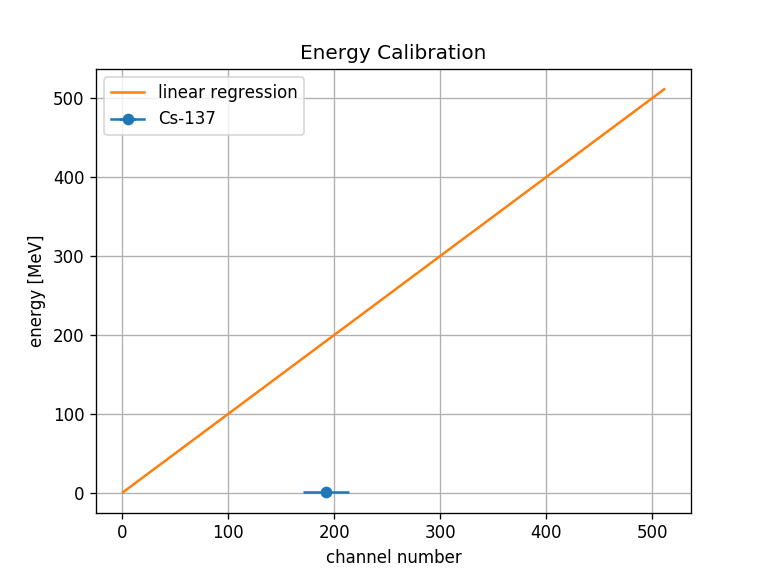

Determined calibration constants from linear regression: E [MeV] = 1.0*N_ch + 0.0
Applying calibration constants


In [12]:
fig, axes = plt.subplots() # makes new plot
plt.grid(True)
plt.xlabel('channel number')
plt.ylabel('energy [MeV]')
plt.title("Energy Calibration")
## PLOT the energy calibration data including uncertainties
plt.errorbar(x=calsource1_channel, 
             y=calsource1_energy, 
             xerr=calsource1_sigma, 
             marker='o',
             label=calsource1.name)

## might want to COMBINE data arrays from different calibration sources for the fit:
## use
## new_array = np.concatenate( [ array1, array2 ] )
## to do so. Then change the data set in the fit command.

## linear regression of the data
## http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
slope = 1.
intercept = 0.
# .... something is missing here....

## ADVANCED METHOD TO FIT:
## use "curve_fit" which allows to take uncertainties into account!
## http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

print("Determined calibration constants from linear regression: E [MeV] = "+str(slope)+"*N_ch + " + str(intercept))
x = np.arange(1,512)
plt.plot(x,slope*x+intercept,label="linear regression")
plt.legend()

## apply energy calibration
print("Applying calibration constants")
sr90.calibrate(slope,intercept)